In [1]:
import pandas as pd
import matplotlib as plt

# Trabalhadores

In [2]:
df_trabalhadores = pd.read_csv("data/D_ETL_IMO_EXTRACAO_SINE_ABERTO_TRABALHADORES_SP.csv", sep=";", encoding="iso8859-1")

/home/chris/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df_trabalhadores.shape)
df_trabalhadores.head()

(3862204, 20)


,NACIONALIDADE,DEFICIENCIAS,BAIRRO,CEP,CODIGO_MUNICIPIO_IBGE,NOME_MUNICIPIO,UF,ESCOLARIDADE,ESTUDANTE,CURSOS_PROFISSIONALIZANTES,GRADUACOES,POS_GRADUACOES,IDIOMAS,HABILITACAO,VEICULOS,DISP_VIAJAR,DISP_DORMIR_EMP,DISP_AUSENTAR_DOMIC,PRETENSOES,MUNICIPIOS_INTERESSE
0,BRASILEIRA,NaN,VILA UNIDOS,1.22145e+07,354990,SAO JOSE DOS CAMPOS,SP,Superior Incompleto,S,NaN,projetos de estruturas aeronautica,NaN,NaN,AB,N,N,N,N,"521110-Vendedor de comércio varejista(N,54,0,I...",NaN
1,BRASILEIRA,NaN,MONTANHAO,9.78414e+06,354870,SAO BERNARDO DO CAMPO,SP,Médio Completo,N,NaN,NaN,NaN,NaN,Nenhum,N,N,N,N,"513505-Ajudante de cozinha(N,0,0,Indiferente)|...",NaN
2,BRASILEIRA,NaN,JARDIM SANTA TEREZINHA (ZON,8.43002e+06,355030,SAO PAULO,SP,Médio Completo,N,NaN,NaN,NaN,NaN,Nenhum,N,N,N,N,"411005-Auxiliar administrativo(N,0,0,Indiferen...",NaN
3,BRASILEIRA,NaN,NaN,6.62613e+06,352500,JANDIRA,SP,Médio Completo,S,NaN,NaN,NaN,NaN,Nenhum,N,S,N,N,"413205-ATENDENTE DE AGENCIA(S,0,0,Indiferente)...",NaN
4,BRASILEIRA,NaN,NaN,1.80654e+07,355220,SOROCABA,SP,Médio Completo,N,NaN,pedagogia,NaN,NaN,Nenhum,N,S,S,S,"422305-OPERADOR DE TELEMARKETING ATIVO(N,17,0,...",NaN


In [4]:
df_trabalhadores.columns

Index(['NACIONALIDADE', 'DEFICIENCIAS', 'BAIRRO', 'CEP',
       'CODIGO_MUNICIPIO_IBGE', 'NOME_MUNICIPIO', 'UF', 'ESCOLARIDADE',
       'ESTUDANTE', 'CURSOS_PROFISSIONALIZANTES', 'GRADUACOES',
       'POS_GRADUACOES', 'IDIOMAS', 'HABILITACAO', 'VEICULOS', 'DISP_VIAJAR',
       'DISP_DORMIR_EMP', 'DISP_AUSENTAR_DOMIC', 'PRETENSOES',
       'MUNICIPIOS_INTERESSE'],
      dtype='object')

## PRETENSOES

### preprocess pretensoes antes da agregação

In [5]:
df_trabalhadores.isna().sum()

NACIONALIDADE                       0
DEFICIENCIAS                  3830214
BAIRRO                        1016628
CEP                               203
CODIGO_MUNICIPIO_IBGE               0
NOME_MUNICIPIO                      0
UF                                  0
ESCOLARIDADE                        0
ESTUDANTE                           1
CURSOS_PROFISSIONALIZANTES    2928149
GRADUACOES                    3358268
POS_GRADUACOES                3851581
IDIOMAS                       3721559
HABILITACAO                         0
VEICULOS                            0
DISP_VIAJAR                         0
DISP_DORMIR_EMP                     0
DISP_AUSENTAR_DOMIC                 1
PRETENSOES                      58249
MUNICIPIOS_INTERESSE          3592472
dtype: int64

In [6]:
df_trabalhadores.dropna(subset=['PRETENSOES'], inplace=True)

In [7]:
df_trabalhadores.isna().sum()

NACIONALIDADE                       0
DEFICIENCIAS                  3772836
BAIRRO                        1016613
CEP                                84
CODIGO_MUNICIPIO_IBGE               0
NOME_MUNICIPIO                      0
UF                                  0
ESCOLARIDADE                        0
ESTUDANTE                           0
CURSOS_PROFISSIONALIZANTES    2870764
GRADUACOES                    3301731
POS_GRADUACOES                3793675
IDIOMAS                       3664909
HABILITACAO                         0
VEICULOS                            0
DISP_VIAJAR                         0
DISP_DORMIR_EMP                     0
DISP_AUSENTAR_DOMIC                 0
PRETENSOES                          0
MUNICIPIOS_INTERESSE          3534223
dtype: int64

In [8]:
df_trabalhadores[['PRETENSOES','LIXO']] = df_trabalhadores.PRETENSOES.str.split("(",1,expand=True)

In [9]:
df_trabalhadores.PRETENSOES.value_counts()[:50].plot.bar(figsize=(20,10), fontsize=18);

### Quantidade de pretensões diferentes

In [10]:
len(df_trabalhadores.PRETENSOES.unique())

10468

## ESCOLARIDADE

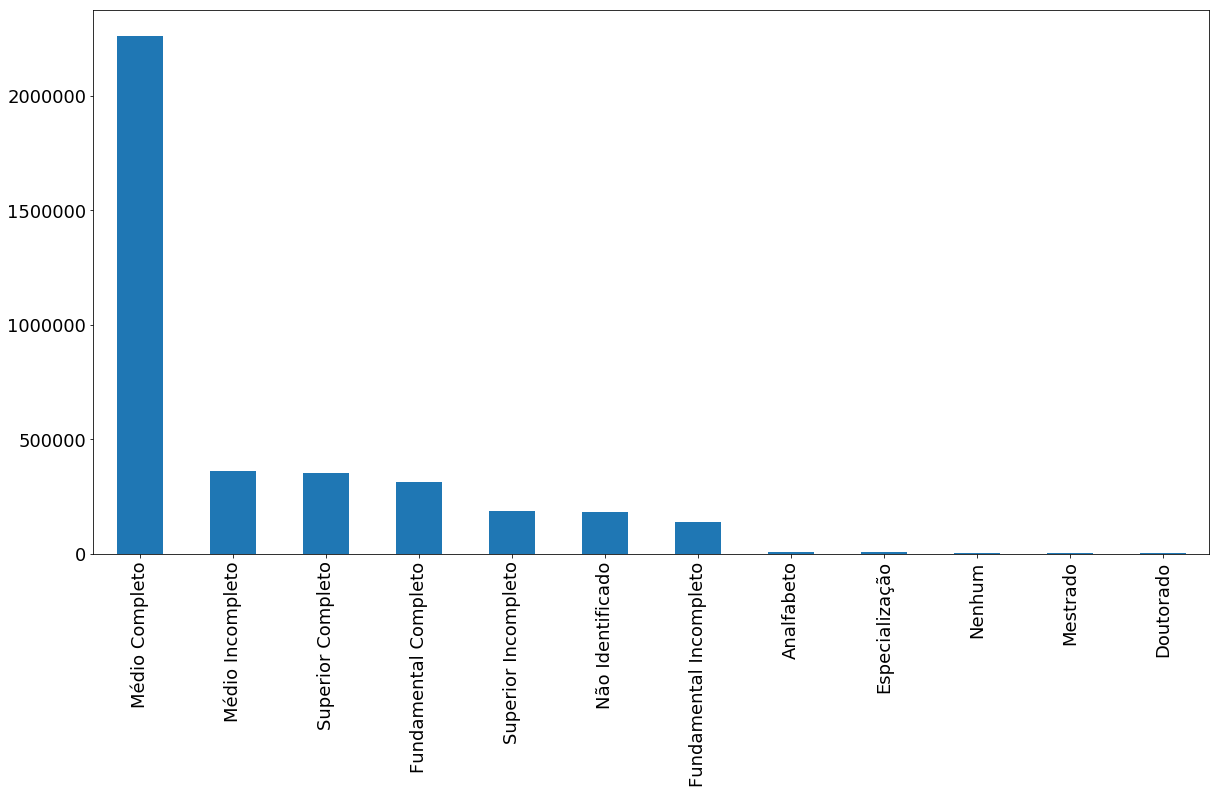

In [11]:
df_trabalhadores.ESCOLARIDADE.value_counts()[:15].plot.bar(figsize=(20,10), fontsize=18);

## GRADUAÇÕES

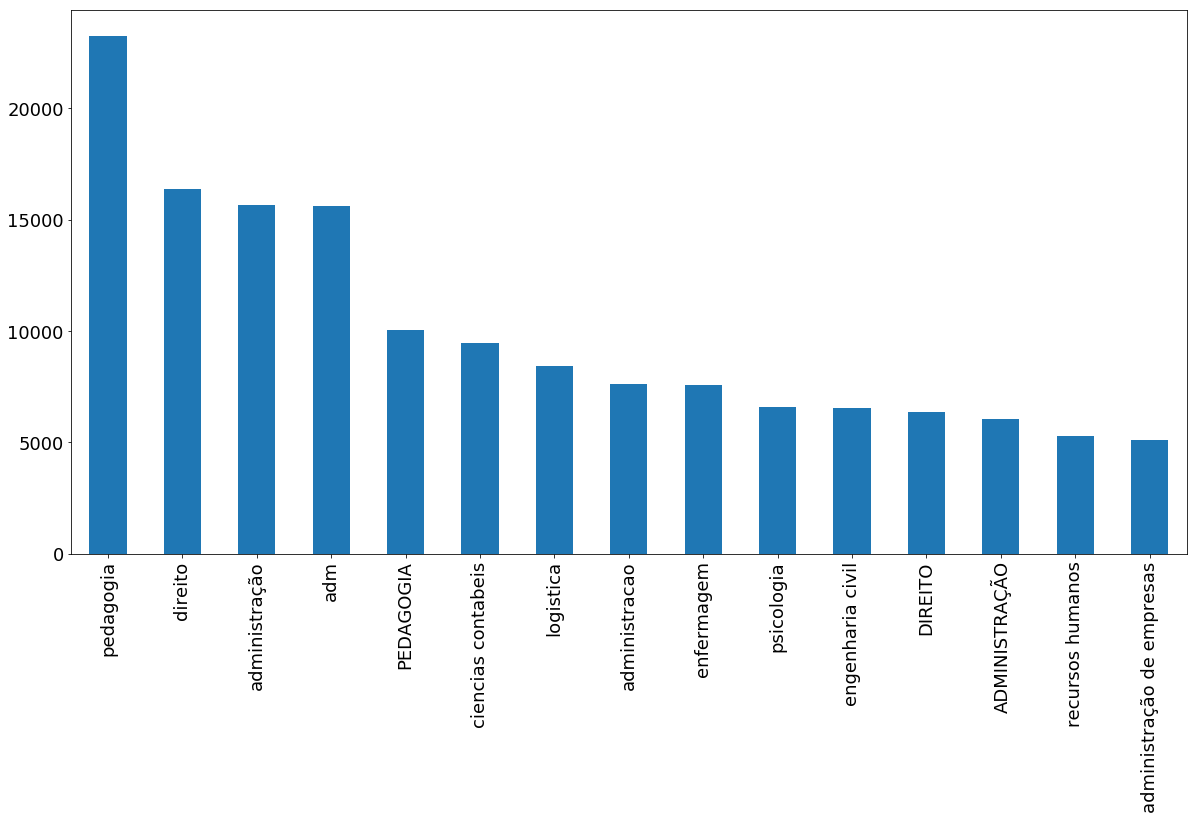

In [12]:
df_trabalhadores.GRADUACOES.value_counts()[:15].plot.bar(figsize=(20,10), fontsize=18);

## CURSOS PROFISSIONALIZANTES

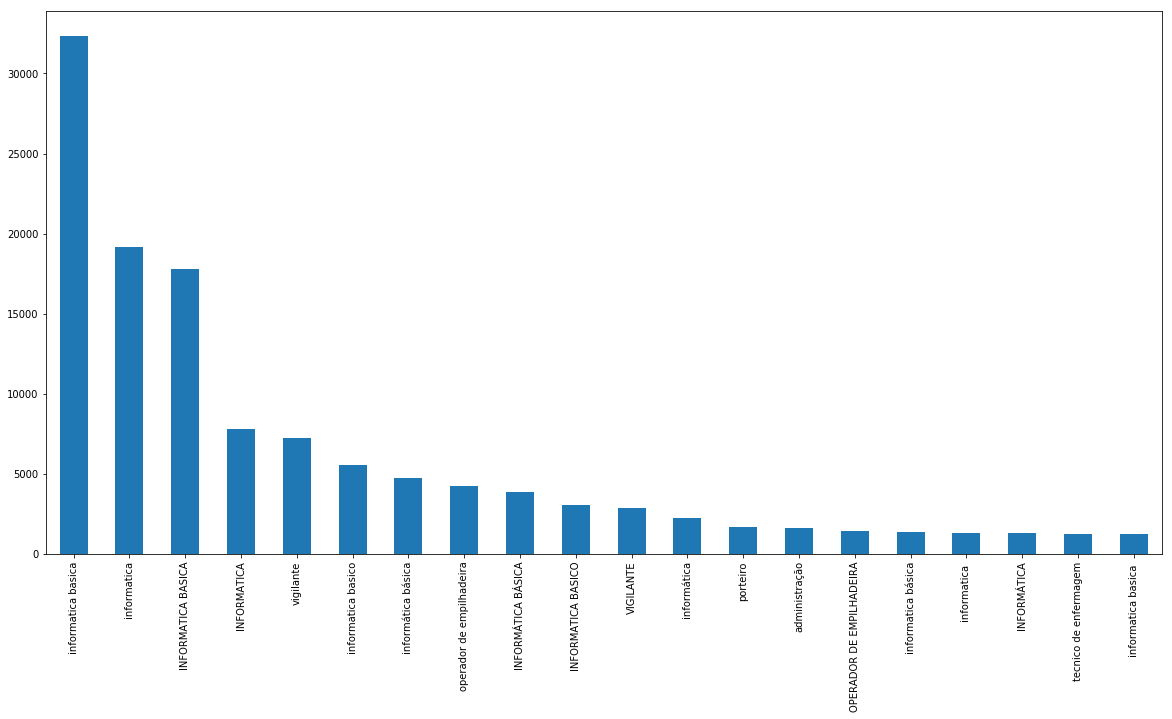

In [13]:
df_trabalhadores.CURSOS_PROFISSIONALIZANTES.value_counts()[:20].plot.bar(figsize=(20,10));

# Vagas

In [14]:
df_vagas = pd.read_csv("data/D_ETL_IMO_EXTRACAO_SINE_ABERTO_VAGAS_SP.csv", sep=";", encoding="iso8859-1")

In [15]:
print(df_vagas.shape)
df_vagas.head()

(98, 12)


,CODIGO_OCUPACAO,TITULO_OCUPACAO,OBSERVACOES_OCUPACAO,CODIGO_MUNICIPIO_IBGE,CEP,VALOR_SALARIO,QTD_VAGAS,TIPO_CONTRATACAO,QTD_EXPERIENCIA,ESCOLARIDADE,REQUERIDO_DEFICIENCIA,DEFICIENCIAS
0,317110,Programador de computador,teste de sistema numero 2.,354880,9530000,0.0,5,0 - Estágio,0,7 - Médio Completo,0,3 - Cadeirante - Física
1,414105,Auxiliar de almoxarifado,NaN,350570,6460200,0.0,2,3 - Permanente,6,7 - Médio Completo,0,0 - Surdez bilateral parcial - Auditiva
2,784105,"Empacotador, a mão","Irá trabalhar junto com a operadora de caixa, ...",351640,7851040,0.0,5,3 - Permanente,0,7 - Médio Completo,0,13 - Baixa Visão - Visual
3,521125,Repositor - em supermercados,NaN,355100,11330690,0.0,3,3 - Permanente,0,0 - Nenhum,0,0 - Surdez bilateral parcial - Auditiva
4,763210,Costureira em geral,"Sexo feminino, com carteira de trabalho, dispo...",353880,18800000,0.0,1,3 - Permanente,1,0 - Nenhum,0,2 - Amputação - Física


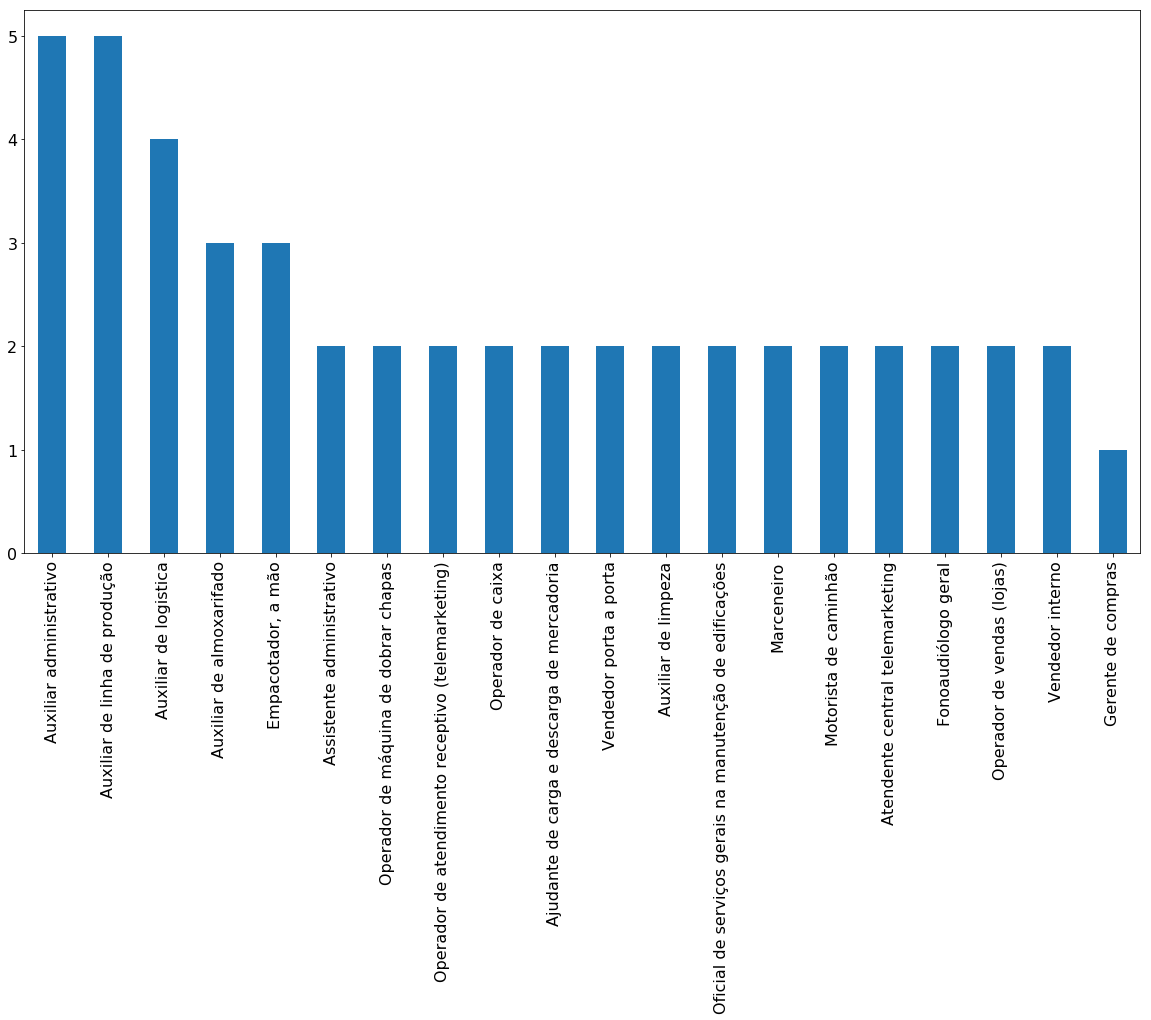

In [16]:
df_vagas.TITULO_OCUPACAO.value_counts()[:20].plot.bar(figsize=(20,10), fontsize=16);

## Poucas vagas

Proporção de trabalhadores por vagas disponíveis

In [17]:
df_trabalhadores.shape[0] / df_vagas.shape[0]

38815.86734693877

In [18]:
df_trabalhadores[df_trabalhadores['PRETENSOES'].str.contains("motorista")].head()

,NACIONALIDADE,DEFICIENCIAS,BAIRRO,CEP,CODIGO_MUNICIPIO_IBGE,NOME_MUNICIPIO,UF,ESCOLARIDADE,ESTUDANTE,CURSOS_PROFISSIONALIZANTES,...,POS_GRADUACOES,IDIOMAS,HABILITACAO,VEICULOS,DISP_VIAJAR,DISP_DORMIR_EMP,DISP_AUSENTAR_DOMIC,PRETENSOES,MUNICIPIOS_INTERESSE,LIXO
288,BRASILEIRA,NaN,JARDIM ARARUAMA,6.70052e+06,351300,COTIA,SP,Médio Completo,N,NaN,...,NaN,NaN,Nenhum,N,N,N,N,783225-Ajudante de motorista,351300|351300|351300,"N,18,0,Indiferente)"
323,BRASILEIRA,NaN,CENTRO,1.3857e+07,355730,ESTIVA GERBI,SP,Médio Completo,N,informatica basica,...,NaN,NaN,Nenhum,N,N,N,N,783225-Ajudante de motorista,NaN,"N,0,0,Indiferente)|848505-ABATEDOR(N,21,0,Come..."
509,BRASILEIRA,NaN,CENTRO,1.31772e+07,355240,SUMARE,SP,Médio Completo,N,NaN,...,NaN,NaN,Nenhum,N,N,N,N,783225-Ajudante de motorista,NaN,"N,129,0,Indiferente)"
845,IGNORADO,NaN,JARDIM AMERICA,1.32223e+07,355650,VARZEA PAULISTA,SP,Médio Completo,N,NaN,...,NaN,NaN,Nenhum,N,N,N,N,783225-Ajudante de motorista,NaN,"N,11,0,Indiferente)"
882,BRASILEIRA,NaN,JARDIM DAMASCENO,2.87913e+06,355030,SAO PAULO,SP,Médio Completo,N,NaN,...,NaN,NaN,Nenhum,N,N,N,N,783225-Ajudante de motorista,NaN,"N,34,0,Indiferente)"


In [19]:
df_trabalhadores[df_trabalhadores['PRETENSOES'].str.contains("cantor")].head()

,NACIONALIDADE,DEFICIENCIAS,BAIRRO,CEP,CODIGO_MUNICIPIO_IBGE,NOME_MUNICIPIO,UF,ESCOLARIDADE,ESTUDANTE,CURSOS_PROFISSIONALIZANTES,...,POS_GRADUACOES,IDIOMAS,HABILITACAO,VEICULOS,DISP_VIAJAR,DISP_DORMIR_EMP,DISP_AUSENTAR_DOMIC,PRETENSOES,MUNICIPIOS_INTERESSE,LIXO
60024,BRASILEIRA,NaN,VILA GOMES CARDIM,3309060,355030,SAO PAULO,SP,Médio Completo,N,NaN,...,NaN,NaN,Nenhum,N,N,N,N,262705-Músico intérprete cantor,NaN,"N,79,0,Indiferente)"
125608,BRASILEIRA,NaN,NaN,2.32800e+06,355030,SAO PAULO,SP,Médio Incompleto,N,NaN,...,NaN,NaN,Nenhum,N,N,N,N,262705-Músico intérprete cantor,NaN,"N,0,0,Tarde/Noite/Madrugada)|421125-Caixa de l..."
132963,BRASILEIRA,NaN,PARQUE SANTA ISABEL,1.80522e+07,355220,SOROCABA,SP,Superior Incompleto,S,NaN,...,NaN,NaN,Nenhum,N,S,S,S,262705-Músico intérprete cantor popular,NaN,"N,0,120,Indiferente)|516205-Babá(N,0,12,Indife..."
177198,BRASILEIRA,NaN,PARQUE SANTO ANTONIO,5.85024e+06,355030,SAO PAULO,SP,Médio Completo,N,NaN,...,NaN,NaN,Nenhum,N,N,N,N,262705-Músico intérprete cantor,NaN,"N,158,0,Indiferente)|422105-RECEPCIONISTA, EM ..."
253759,BRASILEIRA,NaN,Jardim Araruama,6700507,351300,COTIA,SP,Médio Completo,S,cursando(2grau)|informatica basica,...,NaN,NaN,Nenhum,N,N,N,N,262705-Músico intérprete cantor popular,351300|351300,"N,0,0,Indiferente)|342125-Assistente de logíst..."


In [20]:
#list(df_trabalhadores.PRETENSOES.value_counts()[:100].index)